<a href="https://colab.research.google.com/github/obeabi/RegressionNN/blob/main/InvestmentEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import time
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
print("libraries installed")

libraries installed


In [34]:
ticker = 'SPY'
df = yf.download(ticker, interval="1mo", start="1980-12-12")

# Remove the last row (incomplete current month)
df = df.iloc[:-1]

# Ensure the data is sorted by date
df = df.sort_index()
# Calculate the MoM returns
df['MoM_Returns'] = df['Adj Close'].pct_change() * 100

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MoM_Returns
Date,,,,,,,
1993-02-01,43.96875,45.12500,42.81250,44.40625,24.947449,5417600,NaN
1993-03-01,44.56250,45.84375,44.21875,45.18750,25.386356,3019200,1.759329
1993-04-01,45.25000,45.25000,43.28125,44.03125,24.853605,2697200,-2.098572
1993-05-01,44.09375,45.65625,43.84375,45.21875,25.523890,1808000,2.696930
1993-06-01,45.37500,45.81250,44.21875,45.06250,25.435690,3438000,-0.345557


## Create new faetures and perform the averaging

In [35]:
# Create Month and Year columns
data = df.copy()
data['Month'] = data.index.month_name()
data['Year'] = data.index.year

data.head()

,Open,High,Low,Close,Adj Close,Volume,MoM_Returns,Month,Year
Date,,,,,,,,,
1993-02-01,43.96875,45.12500,42.81250,44.40625,24.947449,5417600,NaN,February,1993
1993-03-01,44.56250,45.84375,44.21875,45.18750,25.386356,3019200,1.759329,March,1993
1993-04-01,45.25000,45.25000,43.28125,44.03125,24.853605,2697200,-2.098572,April,1993
1993-05-01,44.09375,45.65625,43.84375,45.21875,25.523890,1808000,2.696930,May,1993
1993-06-01,45.37500,45.81250,44.21875,45.06250,25.435690,3438000,-0.345557,June,1993


In [36]:
# Group by Month and calculate average and median returns
monthly_avg_returns = data.groupby('Month')['MoM_Returns'].mean().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
monthly_median_returns = data.groupby('Month')['MoM_Returns'].median().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

## Visualize the peformance

<ipython-input-37-4d23bfcb01a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')


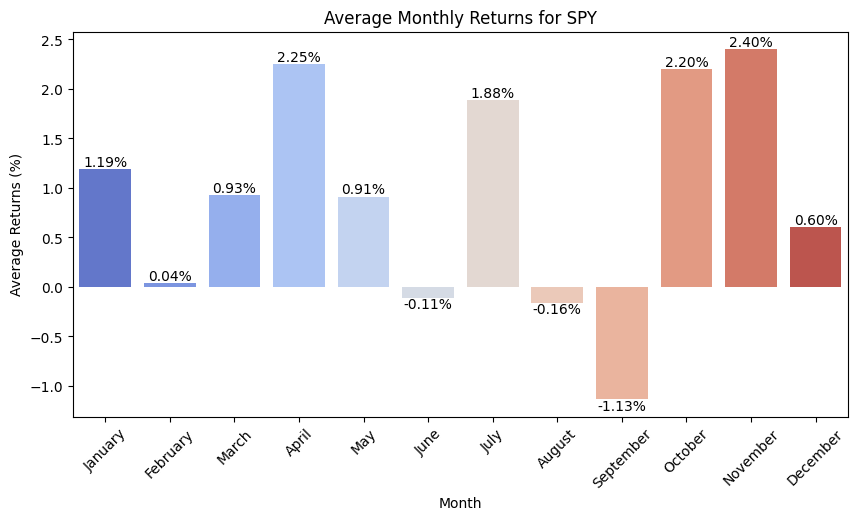

In [37]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
#sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
plt.title(f'Average Monthly Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-38-95e07e06d01a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_median = sns.barplot(x=monthly_median_returns.index, y=monthly_median_returns.values, palette='coolwarm')


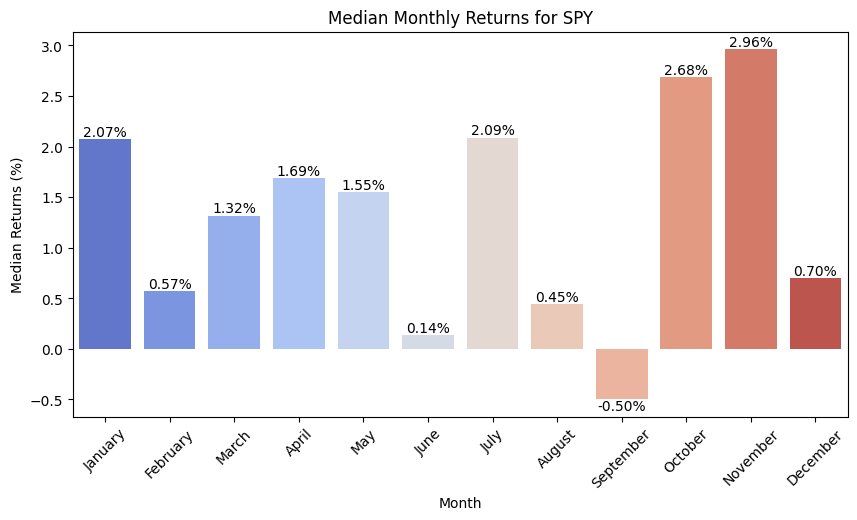

In [38]:
# Plotting median returns with labels
plt.figure(figsize=(10, 5))
ax_median = sns.barplot(x=monthly_median_returns.index, y=monthly_median_returns.values, palette='coolwarm')
plt.title(f'Median Monthly Returns for {ticker}')
plt.ylabel('Median Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_median.containers:
    ax_median.bar_label(i, fmt='%.2f%%')

plt.show()

# To determine if September's performance is statistically significantly different from the other months

In [39]:
# Separate September returns
september_returns = data[data['Month'] == 'September']['MoM_Returns'].dropna()

# Calculate the mean returns for all other months
other_months_returns = data[data['Month'] != 'September']['MoM_Returns'].dropna()

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(september_returns, other_months_returns.mean())

# Display the results
print(f"September Average Return: {september_returns.mean():.2f}%")
print(f"Other Months' Average Return: {other_months_returns.mean():.2f}%")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Check if the p-value is significant at the 0.05 level
if p_value < 0.05:
    print("The difference in returns for September is statistically significant.")
else:
    print("The difference in returns for September is not statistically significant.")


September Average Return: -1.13%
Other Months' Average Return: 1.10%
t-statistic: -2.51
p-value: 0.0176
The difference in returns for September is statistically significant.
